In [231]:
# Imports
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Fuzzy Logic Microwave Oven System

## Variables

We want to determine the optimal cooking time based on:
- **Food Temperature** (input): frozen, normal, and hot
- **Food Weight** (input): light, medium, or heavy
- **Cooking Time** (output): very short, short, normal, long, or very long

## Step 1: Define Fuzzy Variables (Antecedents and Consequents)

First, we need to define our input variables (antecedents) and output variable (consequent). In fuzzy logic, these are called linguistic variables because they use natural language terms.

In [232]:
# Define input variables (antecedents)
temperature = ctrl.Antecedent(np.arange(-18, 71, 1), "temperature")
weight = ctrl.Antecedent(np.arange(0, 1501, 1), "weight")

# Define output variable (consequent)
cooking_time = ctrl.Consequent(np.arange(0, 31, 1), "cooking_time")

print("✅ Fuzzy variables created!")
print(f"Temperature range: {temperature.universe[0]}°C to {temperature.universe[-1]}°C")
print(f"Weight range: {weight.universe[0]}g to {weight.universe[-1]}g")
print(
    f"Cooking time range: {cooking_time.universe[0]} to {cooking_time.universe[-1]} minutes"
)

✅ Fuzzy variables created!
Temperature range: -18°C to 70°C
Weight range: 0g to 1500g
Cooking time range: 0 to 30 minutes


## Step 2: Define Membership Functions

- **Trapezoidal (trapmf)**: Flat-topped trapezoid shape, good for ranges with clear boundaries
- **Triangular (trimf)**: Triangle shape, good for categories with a clear peak

### Temperature Membership Functions:
- **Frozen**: -18°C to 0°C (trapezoidal) : [-18, -18, -10, 0]
- **Normal**: -5°C to 30°C (triangular, peak at 22°C) : [-5, 22, 30]
- **Hot**: 24°C to 70°C (trapezoidal) : [24, 50, 70, 70]

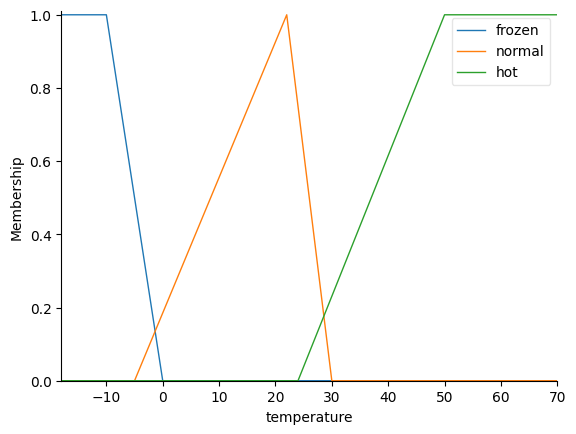

In [233]:
# Define membership functions for temperature
temperature["frozen"] = fuzz.trapmf(temperature.universe, [-18, -18, -10, 0])
temperature["normal"] = fuzz.trimf(temperature.universe, [-5, 22, 30])
temperature["hot"] = fuzz.trapmf(temperature.universe, [24, 50, 70, 70])

# Visualize temperature membership functions
temperature.view()

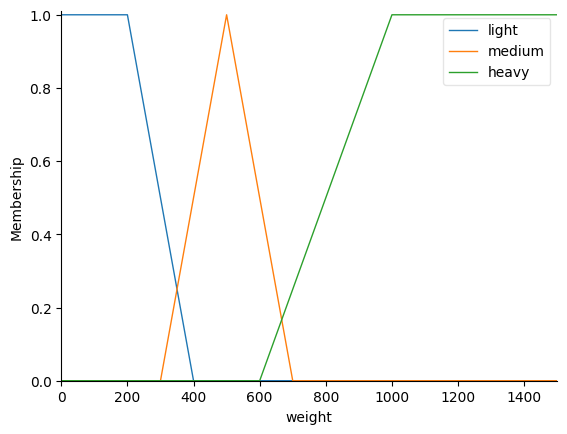

In [234]:
# Define membership functions for weight
weight["light"] = fuzz.trapmf(weight.universe, [0, 0, 200, 400])
weight["medium"] = fuzz.trimf(weight.universe, [300, 500, 700])
weight["heavy"] = fuzz.trapmf(weight.universe, [600, 1000, 1500, 1500])

# Visualize weight membership functions
weight.view()

### Output Membership Functions: Cooking Time

Now we define the output membership functions for cooking time. We have 5 categories ranging from very short to very long cooking times:

- **Very Short**: 0-5 minutes (triangular, peak at 2 min)
- **Short**: 4-10 minutes (triangular, peak at 7 min)
- **Normal**: 8-22 minutes (triangular, peak at 15 min)
- **Long**: 18-30 minutes (triangular, peak at 24 min)
- **Very Long**: 25-30 minutes (trapezoidal, flat from 30 min)

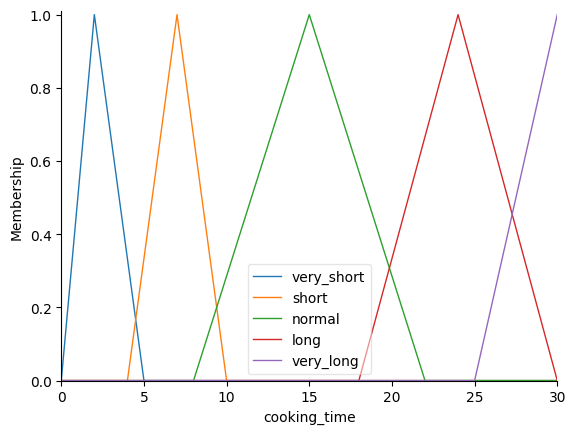

In [235]:
# Define membership functions for cooking time (output)
cooking_time["very_short"] = fuzz.trimf(cooking_time.universe, [0, 2, 5])
cooking_time["short"] = fuzz.trimf(cooking_time.universe, [4, 7, 10])
cooking_time["normal"] = fuzz.trimf(cooking_time.universe, [8, 15, 22])
cooking_time["long"] = fuzz.trimf(cooking_time.universe, [18, 24, 30])
cooking_time["very_long"] = fuzz.trapmf(cooking_time.universe, [25, 30, 30, 30])

# Visualize cooking time membership functions
cooking_time.view()

## Step 3: Define Fuzzy Rules

Each rule follows the format:

**IF** [condition1] **AND** [condition2] **THEN** [output]

### Our Rule Base:

The cooking time depends on both temperature and weight. Generally:
- **Frozen food** needs longer cooking times
- **Heavier food** needs longer cooking times
- **Hot food** needs shorter cooking times
- **Lighter food** needs shorter cooking times

3 x 3 = 9 rules to cover all combinations...

In [236]:
# Define fuzzy rules
rules = [
    ctrl.Rule(temperature["frozen"] & weight["heavy"], cooking_time["very_long"]),
    ctrl.Rule(temperature["frozen"] & weight["medium"], cooking_time["long"]),
    ctrl.Rule(temperature["frozen"] & weight["light"], cooking_time["normal"]),
    ctrl.Rule(temperature["normal"] & weight["light"], cooking_time["short"]),
    ctrl.Rule(temperature["normal"] & weight["medium"], cooking_time["normal"]),
    ctrl.Rule(temperature["normal"] & weight["heavy"], cooking_time["long"]),
    ctrl.Rule(temperature["hot"] & weight["light"], cooking_time["very_short"]),
    ctrl.Rule(temperature["hot"] & weight["medium"], cooking_time["short"]),
    ctrl.Rule(temperature["hot"] & weight["heavy"], cooking_time["normal"]),
]

## Step 4: Create Control System and Simulation

In [237]:
# Create control system
cooking_ctrl = ctrl.ControlSystem(rules)
cooking_simulation = ctrl.ControlSystemSimulation(cooking_ctrl)

print("Fuzzy control system created.")

Fuzzy control system created.


## Step 5: Testing 

### Inputs

Remember that:
- Temperature must be within **-18°C** to **70°C**
- Weight range is **0g** to **1500g**

Note:
- Run one of the test values below then run all the code blocks after "Temperature Memberships" below

In [244]:
# test 1
test_temp = -2
test_weight = 350

In [239]:
# test 2
test_temp = 25
test_weight = 800

In [240]:
# test 3
test_temp = 60
test_weight = 100

### Temperature Memberships

Temperature memberships at -2°C:
Frozen: 0.200
Normal: 0.111
Hot: 0.000


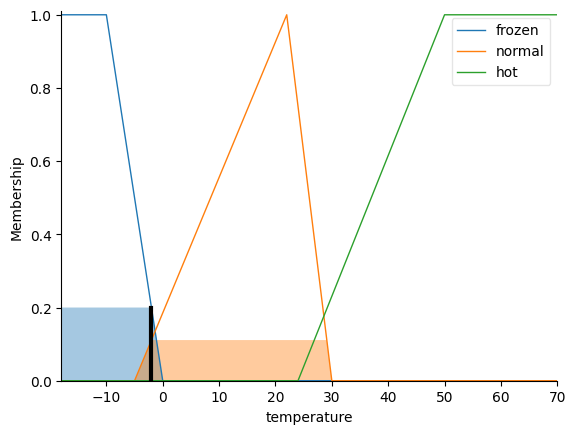

In [245]:
cooking_simulation.input["temperature"] = test_temp
cooking_simulation.input["weight"] = test_weight

cooking_simulation.compute()

result = cooking_simulation.output["cooking_time"]

frozen_membership = fuzz.interp_membership(
    temperature.universe, temperature["frozen"].mf, test_temp
)
normal_membership = fuzz.interp_membership(
    temperature.universe, temperature["normal"].mf, test_temp
)
hot_membership = fuzz.interp_membership(
    temperature.universe, temperature["hot"].mf, test_temp
)

print(f"Temperature memberships at {test_temp}°C:")
print(f"Frozen: {frozen_membership:.3f}")
print(f"Normal: {normal_membership:.3f}")
print(f"Hot: {hot_membership:.3f}")
temperature.view(sim=cooking_simulation)

### Weight Memberships


Weight memberships at 350g:
Light: 0.250
Medium: 0.250
Heavy: 0.000


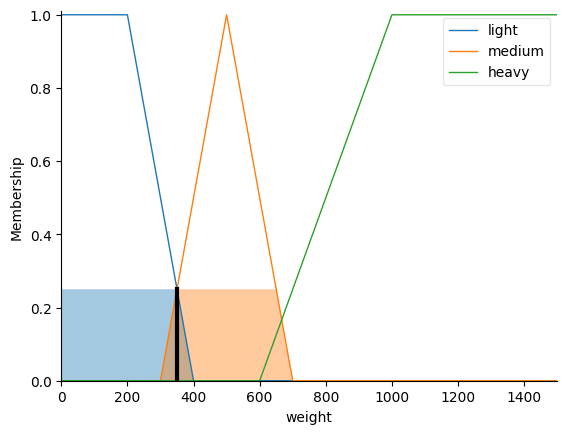

In [246]:
light_membership = fuzz.interp_membership(
    weight.universe, weight["light"].mf, test_weight
)
medium_membership = fuzz.interp_membership(
    weight.universe, weight["medium"].mf, test_weight
)
heavy_membership = fuzz.interp_membership(
    weight.universe, weight["heavy"].mf, test_weight
)

print(f"\nWeight memberships at {test_weight}g:")
print(f"Light: {light_membership:.3f}")
print(f"Medium: {medium_membership:.3f}")
print(f"Heavy: {heavy_membership:.3f}")
weight.view(sim=cooking_simulation)


### Cooking Time Memberships

and the final cooking time, calculated using COG / Centroid.


Rule activation = min(0.200, 0.250) = 0.200
➡️ Cooking Time: 17.73 minutes


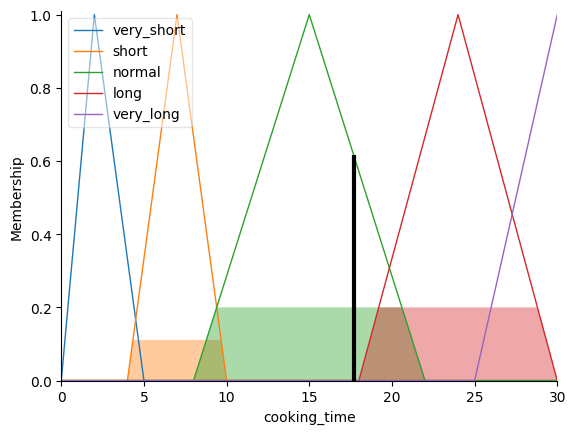

In [247]:
print(
    f"\nRule activation = min({frozen_membership:.3f}, {medium_membership:.3f}) = {min(frozen_membership, medium_membership):.3f}"
)
print(f"➡️ Cooking Time: {result:.2f} minutes")

cooking_time.view(sim=cooking_simulation)